In [93]:
from bs4 import BeautifulSoup
import re
import requests
import pandas as pd
import numpy as np
import os
from csv import writer
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.support.ui import Select
import time
import json
import urllib
from csv import DictWriter
                      
from sklearn import linear_model
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


In [94]:
PATH = "C:\Program Files (x86)\chromedriver.exe"


In [95]:
#df_2020 = pd.DataFrame()
df_2019 = pd.DataFrame()
df_2018 = pd.DataFrame()
df_2017 = pd.DataFrame()
df_2016 = pd.DataFrame()

dic_years = {'2019':df_2019, '2018':df_2018, '2017':df_2017, '2016':df_2016} 

In [96]:
#/////////////////////fix duplicates columns////////////////////////////////////////////////////////////////////////////////

def get_tables():
    i = 0
    arr = []
    driver.execute_script("""
    document.querySelectorAll("a[aria-hidden=true],span[aria-hidden=true]").forEach(function(e) {
        e.parentElement.removeChild(e);
    });
    """)
    time.sleep(5)
    temp_html = driver.find_element(By.CSS_SELECTOR, "html").get_attribute('outerHTML')
    df_school = pd.read_html(temp_html, attrs = {'class':'zebraTable ng-scope'})[0]
    for columns in df_school:
        arr.append(df_school.columns[i][0])
        i = i + 1
    df_school.columns = arr
    return df_school

In [97]:
def GetYearsDemography(fileName,url):
    try:
        driver.get(url)
        driver.implicitly_wait(20)
        driver.maximize_window()
        selectSubtext = driver.find_element(By.ID, "select2-chosen-4")
        selectSubtext.click()
        driver.find_element(By.XPATH, "//*[@id=\"select2-results-4\"]/li[" + "7" + "]").click()
        time.sleep(10)
        selectCity = driver.find_element(By.ID, "select2-chosen-8")
        selectCity.click()
        time.sleep(1)
        options = driver.find_element(By.XPATH, "//*[@id=\"select2-results-8\"]")
        AllOpt = options.find_elements_by_css_selector("li")

        countOpt=len(AllOpt)
        driver.find_element(By.XPATH, "//*[@id=\"select2-results-8\"]/li[" + "1" + "]").click()

        dfData = pd.DataFrame()
        firstTime = True
        for i in range(1, countOpt):

            driver.find_element(By.ID, "select2-chosen-4").click()
            driver.find_element(By.XPATH, "//*[@id=\"select2-results-4\"]/li[" + "7" + "]").click()
            selectCity = driver.find_element(By.ID, "select2-chosen-8")
            selectCity.click()
            driver.find_element(By.XPATH, "//*[@id=\"select2-results-8\"]/li[" + str(i) + "]").click()
            year = selectCity.text
            temp = get_tables()
            temp.insert(0, "Years", year, True)
            print(temp)
            dfData = dfData.append(temp, ignore_index=True)
            if firstTime:
                temp.to_csv(fileName, mode='a', encoding='utf-8-sig',index=False)
                firstTime = False
            else:
                temp.to_csv(fileName, mode='a', encoding='utf-8-sig',index=False, header=False)


    except BaseException as e:
        print("Invalid URL")
    driver.quit()
    return dfData


In [99]:
#/////////////education status//////////////////////////////////////////////////////////////////////////////////////////////

options = webdriver.ChromeOptions() 
options.add_argument("--enable-webgl-developer-extensions") 
options.add_argument("--enable-webgl-draft-extensions") 
driver = webdriver.Chrome(PATH,options=options)
driver.vars = {}
url = "https://boardsgenerator.cbs.gov.il/pages/WebParts/YishuvimPage.aspx?level_1=%D7%A9%D7%9B%D7%A8%20/%20%D7%94%D7%9B%D7%A0%D7%A1%D7%95%D7%AA"
driver.get(url)
element = driver.find_element(By.ID, "select2-chosen-4")
actions = ActionChains(driver)
actions.move_to_element(element).perform()
element = driver.find_element(By.CSS_SELECTOR, "body")
actions = ActionChains(driver)
actions.move_to_element(element).perform()
element = driver.find_element(By.ID, "select2-chosen-4")
actions = ActionChains(driver)
actions.move_to_element(element).click_and_hold().perform()
element = driver.find_element(By.ID, "select2-drop-mask")
actions = ActionChains(driver)
actions.move_to_element(element).release().perform()
driver.find_element(By.XPATH, "//*[@id=\"select2-results-4\"]/li[10]").click()
time.sleep(5)
for i in range(2, 6):
    selectCity = driver.find_element(By.ID, "select2-chosen-8")
    selectCity.click()
    time.sleep(10)
    driver.find_element(By.XPATH, "//*[@id=\"select2-results-8\"]/li[" + str(i) + "]").click()
    time.sleep(10)
    df_temp = get_tables()
    year = selectCity.text
    #print(year)
    dic_years[year] = df_temp
    
    dic_years[year].insert(0, "year", year, True)
driver.quit()
dic_years[year]

,year,סמל היישוב,שם יישוב,"ילדים בגנים של משרד החינוך סה""כ תשע""ו 2015/16","ילדים בגנים של משרד החינוך גיל 3 תשע""ו 2015/16","ילדים בגנים של משרד החינוך גיל 4 תשע""ו 2015/16","ילדים בגנים של משרד החינוך גיל 5 תשע""ו 2015/16","ילדים בגנים של משרד החינוך גיל 6 תשע""ו 2015/16","בתי ספר סה""כ תשע""ו 2015/16","בתי ספר יסודיים (כולל חינוך מיוחד) תשע""ו 2015/16",...,"תלמידים בבתי ספר על-יסודיים תשע""ו 2015/16","תלמידים בחטיבות ביניים תשע""ו 2015/16","תלמידים בבתי ספר תיכוניים תשע""ו 2015/16","ממוצע תלמידים לכיתה סה""כ תשע""ו 2015/16","ממוצע תלמידים לכיתה בבתי ספר יסודיים (כולל חינוך מיוחד) תשע""ו 2015/16","ממוצע תלמידים לכיתה בבתי ספר על-יסודיים תשע""ו 2015/16","ממוצע תלמידים לכיתה בחטיבות ביניים תשע""ו 2015/16","ממוצע תלמידים לכיתה בבתי ספר תיכוניים תשע""ו 2015/16","אחוז זכאים לתעודת בגרות מבין תלמידי כיתות יב תשע""ו 2015/16","אחוז זכאים לתעודת בגרות שעמדו בדרישות הסף של האוניברסיטאות מבין תלמידי כיתות יב תשע""ו 2015/16"
0,2016,472,אבו גוש,375,148,113,112,..,5,4,...,700,323,377,20.00,19.00,20.00,27,16.00,49.20,35.80
1,2016,473,אבו סנאן,670,224,207,230,9,6,4,...,1384,723,661,23.00,22.00,25.00,26,24.00,56.10,39.20
2,2016,182,אבן יהודה,740,215,244,255,26,8,6,...,1906,613,1293,28.00,27.00,31.00,34,29.00,81.10,71.70
3,2016,2710,אום אל-פחם,3588,1151,1144,1183,110,29,18,...,7292,3563,3729,25.79,24.85,26.81,29,25.20,52.90,32.40
4,2016,31,אופקים,1754,566,553,525,110,25,18,...,1978,582,1396,20.42,19.95,21.27,22,20.84,51.70,34.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,2016,538,שעב,427,149,148,127,3,3,..,...,756,427,329,25.00,24.00,26.00,27,25.00,64,52.30
197,2016,8800,שפרעם,2012,634,665,676,37,24,15,...,4238,1853,2385,26.14,25.56,26.82,29,25.11,47.70,41.20
198,2016,5000,תל אביב -יפו,17327,5168,5786,5733,640,163,103,...,23370,10333,13037,24.03,23.63,24.57,27,22.87,74,65.40
199,2016,154,תל מונד,625,171,200,223,31,5,4,...,1751,725,1026,31.00,28.00,35.00,38,33.00,89.40,84.30


In [100]:
df_years_temp = pd.DataFrame(columns=['year', 'city', 'number_of_high_schools', 'number_of_bachelor_graduates_in_percent', 'number_of_high_school_graduates_in_percent', 'number_of_high_school_students', 'Registration_for_higher_education_within_8_years_in_percent', 'number_of_students_in_percent'])
df_education = pd.DataFrame()
for i in dic_years:
    #print(i)
    if(i == '2015'):
        break
    df_temp = dic_years[i]
    df_years_temp['year'] = df_temp.iloc[:,0].values
    df_years_temp['city'] = df_temp.iloc[:,2].values
    df_years_temp['number_of_high_schools'] =  df_temp.iloc[:,12].values
    df_years_temp['number_of_bachelor_graduates_in_percent'] = df_temp.iloc[:,29].values
    df_years_temp['number_of_high_school_graduates_in_percent'] = df_temp.iloc[:,27].values
    df_years_temp['number_of_high_school_students'] = df_temp.iloc[:,22].values
    if(i != '2016'):
        df_years_temp['Registration_for_higher_education_within_8_years_in_percent'] = df_temp.iloc[:,30].values
        df_years_temp['number_of_students_in_percent'] = df_temp.iloc[:,32].values
    df_education = df_education.append(df_years_temp)
df_education.to_csv('data/dfEducation.csv', mode='w+', encoding='utf-8-sig',index=False)    
df_education

C:\Users\netanel.m\AppData\Local\Temp\ipykernel_32268\4027247028.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_education = df_education.append(df_years_temp)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_32268\4027247028.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_education = df_education.append(df_years_temp)


,year,city,number_of_high_schools,number_of_bachelor_graduates_in_percent,number_of_high_school_graduates_in_percent,number_of_high_school_students,Registration_for_higher_education_within_8_years_in_percent,number_of_students_in_percent
0,2019,אבו גוש,3,13.03,59.29,361,..,3.74
1,2019,אבו סנאן,3,12.09,65.81,592,28.50,2.32
2,2019,אבן יהודה,3,55.59,83.96,1087,46.10,3.03
3,2019,אום אל-פחם,13,8.52,59.40,3838,23.30,2.11
4,2019,אופקים,11,12.26,50.24,1551,26.60,1.84
...,...,...,...,...,...,...,...,...
196,2016,שעב,..,52.30,25.0,329,8.5,14.40
197,2016,שפרעם,9,41.20,25.11,2385,9.7,11.90
198,2016,תל אביב -יפו,64,65.40,22.87,13037,41.1,20.80
199,2016,תל מונד,..,84.30,33.0,1026,51.3,13.60


In [101]:
options = webdriver.ChromeOptions() 
options.add_argument("--enable-webgl-developer-extensions") 
options.add_argument("--enable-webgl-draft-extensions") 
driver = webdriver.Chrome(PATH,options=options)
driver.vars = {}
url = "https://boardsgenerator.cbs.gov.il/pages/WebParts/YishuvimPage.aspx?level_1=%D7%A9%D7%9B%D7%A8%20/%20%D7%94%D7%9B%D7%A0%D7%A1%D7%95%D7%AA"
driver.get(url)
time.sleep(2)
element = driver.find_element(By.ID, "select2-chosen-4")
actions = ActionChains(driver)
time.sleep(2)
actions.move_to_element(element).perform()
element = driver.find_element(By.CSS_SELECTOR, "body")
actions = ActionChains(driver)
actions.move_to_element(element).perform()
element = driver.find_element(By.ID, "select2-chosen-4")
actions = ActionChains(driver)
time.sleep(2)
actions.move_to_element(element).click_and_hold().perform()
element = driver.find_element(By.ID, "select2-drop-mask")
actions = ActionChains(driver)
time.sleep(2)
actions.move_to_element(element).release().perform()
driver.find_element(By.XPATH, "//*[@id=\"select2-results-4\"]/li[8]").click()
time.sleep(5)
for i in range(1, 6):
    selectCity = driver.find_element(By.ID, "select2-chosen-8")
    selectCity.click()
    time.sleep(10)
    driver.find_element(By.XPATH, "//*[@id=\"select2-results-8\"]/li[" + str(i) + "]").click()
    time.sleep(10)
    df_temp = get_tables()
    year = selectCity.text
    #print(year)
    dic_years[year] = df_temp
    dic_years[year].insert(0, "year", year, True)
driver.quit()
dic_years[year]

,year,סמל היישוב,שם יישוב,"שכר ממוצע לחודש של שכירים (ש""ח) כלל השכירים","שכר ממוצע לחודש של שכירים (ש""ח) גברים","שכר ממוצע לחודש של שכירים (ש""ח) נשים",אחוז שינוי ריאלי לעומת השנה הקודמת של שכר ממוצע לחודש של שכירים כלל השכירים,אחוז שינוי ריאלי לעומת השנה הקודמת של שכר ממוצע לחודש של שכירים גברים,אחוז שינוי ריאלי לעומת השנה הקודמת של שכר ממוצע לחודש של שכירים נשים,מספר השכירים,אחוז השכירים המשתכרים עד שכר מינימום,מספר העצמאים,"הכנסה ממוצעת לחודש של העצמאים (ש""ח)",אחוז שינוי ריאלי של הכנסה ממוצעת לחודש של העצמאים לעומת השנה הקודמת,אחוז העצמאים המשתכרים עד מחצית השכר הממוצע,"מדד אי-השוויון שכירים (מדד ג'יני, 0 שוויון מלא)"
0,2015,472,אבו גוש,6275.59,6928.63,5240.03,4.7,3.9,6.3,2728,42.2,130,6656.52,-0.8,53.1,0.34
1,2015,473,אבו סנאן,6060.40,7314.21,4302.60,4.3,5.3,2.3,4900,49.7,435,7940.37,9.8,44.6,0.39
2,2015,182,אבן יהודה,13502.86,16816.52,10097.43,5.2,3.6,5.7,6077,27.6,660,12913.98,-1.3,32.3,0.48
3,2015,2710,אום אל-פחם,5289.00,6096.00,3811.00,3.0,2.4,5.9,16739,56.9,1487,7864.00,3.0,44.5,0.38
4,2015,31,אופקים,9496.00,12155.00,7006.00,6.4,6.7,5.0,2967,38.1,231,9128.00,19.6,39.4,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2015,538,שעב,5312.02,6020.50,4112.21,4.7,4.1,6.9,2443,52.6,150,6452.12,3.8,60.0,0.35
220,2015,8800,שפרעם,6142.00,7286.00,4489.00,3.7,4.8,2.2,15471,48.8,1109,8546.00,7.1,41.8,0.38
221,2015,5000,תל אביב -יפו,10808.00,12888.00,8667.00,5.8,6.0,4.5,224083,31.9,23222,11685.00,6.2,37.5,0.47
222,2015,154,תל מונד,14056.74,17904.35,10202.37,4.1,4.3,2.9,5699,28.5,603,13015.24,5.9,31.0,0.50


In [124]:
df_employees_info = pd.DataFrame()
df_years_temp = pd.DataFrame(columns=['year', 'city','number_of_self_employees', 'number_of_employees', 'employees_average_monthly_wage', 'employees_average_monthly_wage_change_in_percent', 'self_employees_average_monthly_wage', 'self_employees_average_monthly_wage_change_in_percent'])
for i in dic_years:
    #print(i)
    if(i == '2015'):
        break
    df_temp = dic_years[i]
    df_years_temp['year'] = df_temp.iloc[:,0].values
    df_years_temp['city'] = df_temp.iloc[:,2].values
    df_years_temp['number_of_self_employees'] =  df_temp.iloc[:,11].values
    df_years_temp['number_of_employees'] = df_temp.iloc[:,9].values
    df_years_temp['employees_average_monthly_wage'] = df_temp.iloc[:,3].values
    df_years_temp['employees_average_monthly_wage_change_in_percent'] = df_temp.iloc[:,6].values
    df_years_temp['self_employees_average_monthly_wage'] = df_temp.iloc[:,12].values
    df_years_temp['self_employees_average_monthly_wage_change_in_percent'] = df_temp.iloc[:,13].values
    df_employees_info = df_employees_info.append(df_years_temp)

df_employees_info.drop
df_employees_info.drop(df_employees_info.index[219], inplace=True)
# df = df_employees_info[df_employees_info['city'] == "שעב"]
# df = df[df['year'] == "2016"]

# print(df)
# df_employees_info.drop(df_employees_info.index[df] , inplace=True)

# df.drop(df.index[df['Col1'] == 0], inplace=True)

# df_employees_info = df_employees_info.drop(df_employees_info[df_employees_info['city'] == "שעב" 
#                                                              & df_employees_info['year'] == "2016"].index)

# print(df_employees_info)
# for index in df_employees_info:
#     df = df[df.line_race != 0]
    
#     if df_employees_info[index]['city'].value=="שעב" and df_employees_info[index]['year'].value=="2016":
#         print(index)
# #         index.drop
        
    
df_employees_info.to_csv('data/dfEmployees.csv', mode='w+', encoding='utf-8-sig',index=False)
df_employees_info

C:\Users\netanel.m\AppData\Local\Temp\ipykernel_32268\1759159489.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_employees_info = df_employees_info.append(df_years_temp)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_32268\1759159489.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_employees_info = df_employees_info.append(df_years_temp)


,year,city,number_of_self_employees,number_of_employees,employees_average_monthly_wage,employees_average_monthly_wage_change_in_percent,self_employees_average_monthly_wage,self_employees_average_monthly_wage_change_in_percent
0,2019,אבו גוש,151,3393,7294.03,1.35,10064.79,-7.67
1,2019,אבו סנאן,626,5841,7071.17,1.95,8456.80,-0.75
2,2019,אבן יהודה,899,6265,14054.00,1.58,12517.09,-1.72
3,2019,אום אל-פחם,1918,22149,5869.82,1.16,8883.18,-0.83
4,2019,אופקים,295,3342,9398.05,0.38,11301.74,-1.31
...,...,...,...,...,...,...,...,...
218,2016,שלומי,218,3157,8164.68,1.59,10706.09,8.26
220,2016,שפרעם,1161,16307,6236.00,2.00,8996.00,5.79
221,2016,תל אביב -יפו,24447,223935,11017.00,2.50,11908.00,2.42
222,2016,תל מונד,660,5819,13983.03,-0.02,13735.86,6.07


In [125]:
#final_DataFrame = pd.DataFrame(columns=['year', 'city', 'population', 'potential_student_count', 'number_of_self_employees', 'number_of_employees', 'employees_average_monthly_wage', 'employees_average_monthly_wage_change_in_percent', 'self_employees_average_monthly_wage', 'self_employees_average_monthly_wage_change_in_percent', 'number_of_high_schools', 'number_of_bachelor_graduates_in_percent', 'number_of_high_school_graduates_in_percent', 'number_of_high_school_students', 'Registration_for_higher_education_within_8_years_in_percent', 'number_of_students_in_percent'])

#df_temp = pd.DataFrame(columns=['year', 'city','number_of_self_employees', 'number_of_employees', 'employees_average_monthly_wage', 'employees_average_monthly_wage_change_in_percent', 'self_employees_average_monthly_wage', 'self_employees_average_monthly_wage_change_in_percent'])
df_education = pd.read_csv('data/dfEducation.csv')
df_employees_info = pd.read_csv('data/dfEmployees.csv')

df_eduoEmplo = [df_education, df_employees_info]
df_eduoEmplo = pd.merge(df_education, df_employees_info,  how='left', left_on=['year','city'], right_on = ['year','city'])
#df_temp = df_temp.loc[:,~df_temp.columns.duplicated()].copy()
#print(df_temp)
df_eduoEmplo
#final_DataFrame = pd.merge(final_DataFrame, df_temp, how='inner')#, left_on=['year','city'], right_on = ['year','city'])
#final_DataFrame

,year,city,number_of_high_schools,number_of_bachelor_graduates_in_percent,number_of_high_school_graduates_in_percent,number_of_high_school_students,Registration_for_higher_education_within_8_years_in_percent,number_of_students_in_percent,number_of_self_employees,number_of_employees,employees_average_monthly_wage,employees_average_monthly_wage_change_in_percent,self_employees_average_monthly_wage,self_employees_average_monthly_wage_change_in_percent
0,2019,אבו גוש,3,13.03,59.29,361,..,3.74,151.0,3393.0,7294.03,1.35,10064.79,-7.67
1,2019,אבו סנאן,3,12.09,65.81,592,28.50,2.32,626.0,5841.0,7071.17,1.95,8456.80,-0.75
2,2019,אבן יהודה,3,55.59,83.96,1087,46.10,3.03,899.0,6265.0,14054.00,1.58,12517.09,-1.72
3,2019,אום אל-פחם,13,8.52,59.40,3838,23.30,2.11,1918.0,22149.0,5869.82,1.16,8883.18,-0.83
4,2019,אופקים,11,12.26,50.24,1551,26.60,1.84,295.0,3342.0,9398.05,0.38,11301.74,-1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,2016,שעב,..,52.30,25.0,329,8.5,14.40,NaN,NaN,NaN,NaN,NaN,NaN
800,2016,שפרעם,9,41.20,25.11,2385,9.7,11.90,1161.0,16307.0,6236.00,2.00,8996.00,5.79
801,2016,תל אביב -יפו,64,65.40,22.87,13037,41.1,20.80,24447.0,223935.0,11017.00,2.50,11908.00,2.42
802,2016,תל מונד,..,84.30,33.0,1026,51.3,13.60,660.0,5819.0,13983.03,-0.02,13735.86,6.07


In [126]:
fileName="data/YearsDemography.csv"

if os.path.isfile(fileName):
    dfDemography = pd.read_csv(fileName)
else:
#     PATH = "C:/Users/shake/chromedriver.exe"
    url = "https://boardsgenerator.cbs.gov.il/pages/WebParts/YishuvimPage.aspx?level_1=%D7%A9%D7%9B%D7%A8%20/%20%D7%94%D7%9B%D7%A0%D7%A1%D7%95%D7%AA"
    driver = webdriver.Chrome(PATH)
    dfDemography = GetYearsDemography(fileName,url)
    
dfDemography

,Years,שם יישוב,סמל היישוב,"צפיפות אוכלוסייה לקמ''ר ביישובים שמנו 5,000 תושבים ויותר","סה""כ אוכלוסייה בסוף השנה",יהודים ואחרים (אחוזים),יהודים (אחוזים מתוך יהודים ואחרים),ערבים (אחוזים),מוסלמים (אחוזים מתוך האוכלוסייה הערבית),נוצרים (אחוזים מתוך האוכלוסייה הערבית),...,"נישאים שיעור ל-1,000 תושבים לא נשואים בני 15 ומעלה 2019","מתגרשים סה""כ גברים ונשים 2019","מתגרשים שיעור ל-1,000 תושבים נשואים בני 15 ומעלה 2019",אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) סך מוסדות דיור משותף ברשות,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) סך דיירי דיור משותף ברשות,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים בבתי אבות ובדיור מוגן,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים במוסדות חינוך,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים במוסדות דת,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים במוסדות אשפוז כולל הוסטלים,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים במוסדות אחרים
0,2020,אבו גוש,472,4114.4,7771.0,-,-,98.9,99.8,-,...,44.6,26,8.1,4,31,-,0.3,0.04,0.06,-
1,2020,אבו סנאן,473,2136.9,14306.0,-,-,99.8,54.6,15.2,...,42.2,29,4.7,-,-,-,-,-,-,-
2,2020,אבן יהודה,182,1696.2,14020.0,100,98.4,-,-,-,...,20,40,7,5,347,1.35,0.3,-,0.83,-
3,2020,אום אל-פחם,2710,2187.4,56777.0,-,-,99.9,100,-,...,53.7,104,4.5,..,..,..,..,..,..,..
4,2020,אופקים,31,1990.8,32555.0,99.3,93.4,-,-,-,...,44.5,119,10.7,6,559,0.87,0.58,0.17,-,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3592,2003,שעב,538,2.9,2.8,14.04,13.56,13.17,9.43,17.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3593,2003,שפרעם,8800,15.7,15.5,13.2,12.5,10.9,8.33,16.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3594,2003,תל אביב -יפו,5000,173.8,189.6,7,5.5,4.8,5.2,18.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3595,2003,תל מונד,154,4,3.9,11.43,10.62,9.73,7.77,12.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
dfDemography=dfDemography.rename(columns={"Years":"year"})
dfDemography=dfDemography.rename(columns={"שם יישוב":"city"})
dfDemography=dfDemography.rename(columns={'סה"כ אוכלוסייה בסוף השנה':"population"})
dfDemography=dfDemography.rename(columns={'אחוז באוכלוסייה בסוף השנה בני 19-15':"Percentage of population at the end of the year aged 19-15"})
dfDemography=dfDemography.rename(columns={'אחוז באוכלוסייה בסוף השנה בני 29-20':"Percentage of population at the end of the year aged 20-29"})
dfDemography=dfDemography.rename(columns={'אחוז באוכלוסייה בסוף השנה בני 44-30':"Percentage of population at the end of the year aged 30-44"})

dfYearsCityPop=dfDemography

populationList = dfYearsCityPop['population'].tolist()
for i in range(len(populationList)):
    if (populationList[i] <= 1000) :
            populationList[i] = populationList[i] * 1000

dfYearsCityPop['population'] = populationList
dfYearsCityPop.to_csv('data/dfYearsCityPop.csv', mode='w+', encoding='utf-8-sig',index=False)
dfYearsCityPop

,year,city,סמל היישוב,"צפיפות אוכלוסייה לקמ''ר ביישובים שמנו 5,000 תושבים ויותר",population,יהודים ואחרים (אחוזים),יהודים (אחוזים מתוך יהודים ואחרים),ערבים (אחוזים),מוסלמים (אחוזים מתוך האוכלוסייה הערבית),נוצרים (אחוזים מתוך האוכלוסייה הערבית),...,"נישאים שיעור ל-1,000 תושבים לא נשואים בני 15 ומעלה 2019","מתגרשים סה""כ גברים ונשים 2019","מתגרשים שיעור ל-1,000 תושבים נשואים בני 15 ומעלה 2019",אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) סך מוסדות דיור משותף ברשות,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) סך דיירי דיור משותף ברשות,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים בבתי אבות ובדיור מוגן,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים במוסדות חינוך,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים במוסדות דת,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים במוסדות אשפוז כולל הוסטלים,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים במוסדות אחרים
0,2020,אבו גוש,472,4114.4,7771.0,-,-,98.9,99.8,-,...,44.6,26,8.1,4,31,-,0.3,0.04,0.06,-
1,2020,אבו סנאן,473,2136.9,14306.0,-,-,99.8,54.6,15.2,...,42.2,29,4.7,-,-,-,-,-,-,-
2,2020,אבן יהודה,182,1696.2,14020.0,100,98.4,-,-,-,...,20,40,7,5,347,1.35,0.3,-,0.83,-
3,2020,אום אל-פחם,2710,2187.4,56777.0,-,-,99.9,100,-,...,53.7,104,4.5,..,..,..,..,..,..,..
4,2020,אופקים,31,1990.8,32555.0,99.3,93.4,-,-,-,...,44.5,119,10.7,6,559,0.87,0.58,0.17,-,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3592,2003,שעב,538,2.9,2800.0,14.04,13.56,13.17,9.43,17.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3593,2003,שפרעם,8800,15.7,15500.0,13.2,12.5,10.9,8.33,16.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3594,2003,תל אביב -יפו,5000,173.8,189600.0,7,5.5,4.8,5.2,18.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3595,2003,תל מונד,154,4,3900.0,11.43,10.62,9.73,7.77,12.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [236]:
dfYearsCityPop = pd.read_csv("data/dfYearsCityPop.csv")

Sum_filterdfDemograph =dfYearsCityPop.iloc[:, [16,17,18]]
Sum_filterdfDemograph['precent count Age 15-44 '] = Sum_filterdfDemograph.sum(axis=1, numeric_only= True)
Sum_filterdfDemograph.insert(loc=0, column='year', value=dfYearsCityPop['year'].values)
Sum_filterdfDemograph.insert(loc=1, column='city', value=dfYearsCityPop['city'].values)
Sum_filterdfDemograph.insert(loc=2, column='population', value=dfYearsCityPop['population'].values)

Sum_filterdfDemograph = Sum_filterdfDemograph.drop(columns=['Percentage of population at the end of the year aged 19-15'])
Sum_filterdfDemograph = Sum_filterdfDemograph.drop(columns=['Percentage of population at the end of the year aged 20-29'])
Sum_filterdfDemograph = Sum_filterdfDemograph.drop(columns=['Percentage of population at the end of the year aged 30-44'])
Sum_filterdfDemograph.columns = Sum_filterdfDemograph.columns.str.replace('precent count Age 15-44', 'percent_count_Age')
Sum_filterdfDemograph["percent_count_Age"]=Sum_filterdfDemograph.iloc[:,[3]].apply(pd.to_numeric)
Sum_filterdfDemograph=Sum_filterdfDemograph.iloc[:, [0,1,2,4]]
Sum_filterdfDemograph["percent_count_Age"]

C:\Users\netanel.m\AppData\Local\Temp\ipykernel_32268\4034931125.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sum_filterdfDemograph['precent count Age 15-44 '] = Sum_filterdfDemograph.sum(axis=1, numeric_only= True)


0          45.97
1          48.03
2          35.39
3          47.55
4          41.65
          ...   
3592      342.00
3593     1692.00
3594    12676.00
3595      298.00
3596     1290.00
Name: percent_count_Age, Length: 3597, dtype: float64

In [251]:
      
final_DataFrame = pd.merge(Sum_filterdfDemograph,df_eduoEmplo, how='inner', left_on=['year','city'], right_on = ['year','city'])

final_DataFrame.to_csv('data/finalDataFrame.csv', mode='w+', encoding='utf-8-sig',index=False)  
final_DataFrame 


0      46.76
1      48.24
2      35.91
3      47.45
4      41.68
       ...  
799    39.50
800    36.90
801    23.20
802    33.10
803    44.10
Name: percent_count_Age, Length: 804, dtype: float64

In [238]:
# final_DataFrame = pd.read_csv('data/finalDataFrame.csv')
# final_DataFrame = final_DataFrame.replace( '..', np.nan )
# final_DataFrame = final_DataFrame.replace( 'NaN', np.nan )
# final_DataFrame = final_DataFrame.replace( '-', np.nan )

# final_DataFrame

# Filling average value instead of null cells

In [239]:
final_DataFrame = pd.read_csv('data/finalDataFrame.csv')
tempValue=-9999999999
final_DataFrame = final_DataFrame.drop(columns=['city'])
final_DataFrame = final_DataFrame.drop(columns=['year'])

final_DataFrame = final_DataFrame.replace( '..', tempValue )
final_DataFrame = final_DataFrame.replace( 'NaN', tempValue )
final_DataFrame = final_DataFrame.replace( '-', tempValue )
final_DataFrame = final_DataFrame.astype(float)
final_DataFrame = final_DataFrame.replace( tempValue, np.nan)
final_DataFrame
for column in final_DataFrame:
    #Finding the mean of the column having NaN
    mean_value=final_DataFrame[column].mean() 
    final_DataFrame[column].fillna(value=mean_value, inplace=True)
final_DataFrame

,population,percent_count_Age,number_of_high_schools,number_of_bachelor_graduates_in_percent,number_of_high_school_graduates_in_percent,number_of_high_school_students,Registration_for_higher_education_within_8_years_in_percent,number_of_students_in_percent,number_of_self_employees,number_of_employees,employees_average_monthly_wage,employees_average_monthly_wage_change_in_percent,self_employees_average_monthly_wage,self_employees_average_monthly_wage_change_in_percent
0,7698.0,46.76,3.000000,13.03,59.29,361.0,24.730698,3.74,151.0000,3393.000,7294.030000,1.350000,10064.7900,-7.670000
1,14099.0,48.24,3.000000,12.09,65.81,592.0,28.500000,2.32,626.0000,5841.000,7071.170000,1.950000,8456.8000,-0.750000
2,13826.0,35.91,3.000000,55.59,83.96,1087.0,46.100000,3.03,899.0000,6265.000,14054.000000,1.580000,12517.0900,-1.720000
3,56109.0,47.45,13.000000,8.52,59.40,3838.0,23.300000,2.11,1918.0000,22149.000,5869.820000,1.160000,8883.1800,-0.830000
4,30662.0,41.68,11.000000,12.26,50.24,1551.0,26.600000,1.84,295.0000,3342.000,9398.050000,0.380000,11301.7400,-1.310000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,6700.0,39.50,11.704745,52.30,25.00,329.0,8.500000,14.40,1421.6925,17520.195,8712.128312,2.974587,9856.2883,3.007075
800,40500.0,36.90,9.000000,41.20,25.11,2385.0,9.700000,11.90,1161.0000,16307.000,6236.000000,2.000000,8996.0000,5.790000
801,438800.0,23.20,64.000000,65.40,22.87,13037.0,41.100000,20.80,24447.0000,223935.000,11017.000000,2.500000,11908.0000,2.420000
802,12200.0,33.10,11.704745,84.30,33.00,1026.0,51.300000,13.60,660.0000,5819.000,13983.030000,-0.020000,13735.8600,6.070000


In [240]:

def generateGragh(columnsName,color1,color2):
    x = reshapeCol(final_DataFrame,columnsName)
    plt.scatter(x=x,y=y,c=color1,marker='s',label=columnsName)
    m = lr.fit(X=x, y=y)
    plt.plot(x,m.predict(x),color2,linewidth=3)

In [241]:
# final_DataFrame = pd.read_csv('data/finalDataFrame.csv')
# final_DataFrame

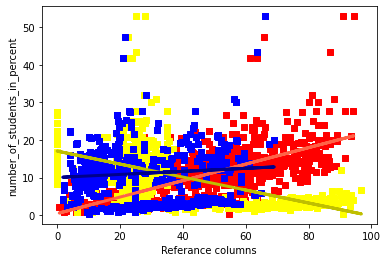

In [242]:
#/////////////////////////////////////////test 1////////////////////////////////////////////////////

def reshapeCol(final_DataFrame,str):
  return final_DataFrame[[str]].values.reshape(final_DataFrame[str].shape[0],1)  



columns_names =['number_of_bachelor_graduates_in_percent', 'number_of_high_school_graduates_in_percent', 'Registration_for_higher_education_within_8_years_in_percent', 'number_of_students_in_percent']



# final_DataFrame = pd.read_csv('data/finalDataFrame.csv')
# final_DataFrame = final_DataFrame.replace( '..', np.nan )
# final_DataFrame = final_DataFrame.replace( 'NaN', np.nan )
# final_DataFrame = final_DataFrame.replace( '-', np.nan )
# final_DataFrame = final_DataFrame.drop(columns=['city'])
# final_DataFrame = final_DataFrame.filter(columns_names,axis=1)
# final_DataFrame = final_DataFrame.dropna()
# final_DataFrame = final_DataFrame.astype(float)

# print(final_DataFrame)


number_of_students='number_of_students_in_percent'

number_of_bachelor_graduates_in_percent='number_of_bachelor_graduates_in_percent'
number_of_high_school_graduates_in_percent='number_of_high_school_graduates_in_percent'
Registration_for_higher_education_within_8_years_in_percent='Registration_for_higher_education_within_8_years_in_percent'

lr = linear_model.LinearRegression() # create a linear regression object

y = final_DataFrame[[number_of_students]].values.reshape(final_DataFrame[number_of_students].shape[0],1)


generateGragh(number_of_bachelor_graduates_in_percent,'r','tomato')
generateGragh(number_of_high_school_graduates_in_percent,'yellow','y')
generateGragh(Registration_for_higher_education_within_8_years_in_percent,'blue','darkblue')


#take all columns for next blocks
x = final_DataFrame[['number_of_bachelor_graduates_in_percent', 'number_of_high_school_graduates_in_percent', 'Registration_for_higher_education_within_8_years_in_percent']]#plt.scatter(x=x,y=y,c='b',marker='s',label='all')
m = lr.fit(X=x, y=y);


plt.xlabel('Referance columns')
plt.ylabel(number_of_students)
plt.show()

In [243]:

print("R2:",lr.score(x,y))
print("R2:",r2_score(y,lr.predict(x)))

R2: 0.5900176076939934
R2: 0.5900176076939934


                                                    population  \
population                                            1.000000   
percent_count_Age                                    -0.141227   
number_of_high_schools                                0.882670   
number_of_bachelor_graduates_in_percent              -0.044590   
number_of_high_school_graduates_in_percent            0.008622   
number_of_high_school_students                        0.951853   
Registration_for_higher_education_within_8_year...    0.029342   
number_of_students_in_percent                        -0.026193   
number_of_self_employees                              0.906137   
number_of_employees                                   0.972454   
employees_average_monthly_wage                        0.057820   
employees_average_monthly_wage_change_in_percent     -0.016733   
self_employees_average_monthly_wage                   0.060819   
self_employees_average_monthly_wage_change_in_p...   -0.029072   

         

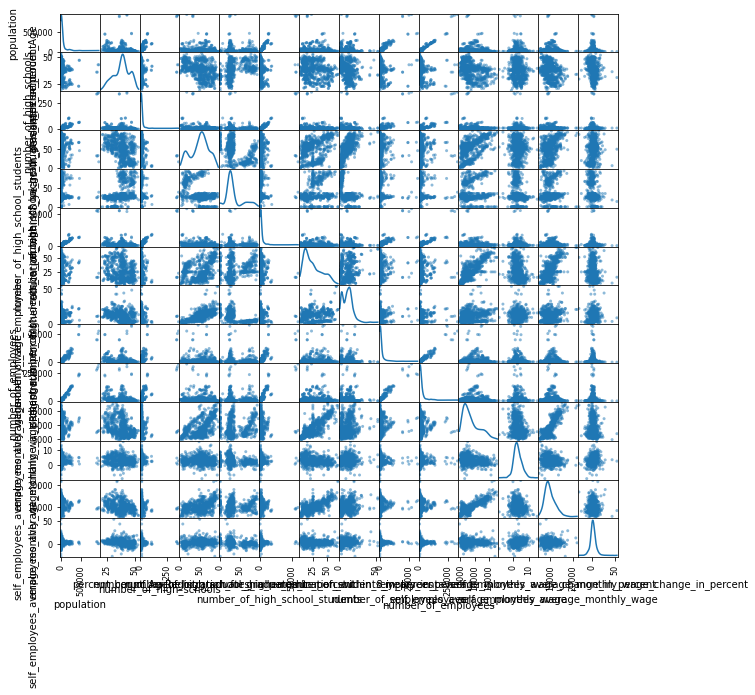

In [244]:
print(final_DataFrame.corr())
pd.plotting.scatter_matrix(final_DataFrame, figsize=(10,10), diagonal='kde')
plt.show()

In [245]:
# # teams that won la liga española
# final_DataFrame = final_DataFrame[final_DataFrame['population'] == 1]['Team'].value_counts()

# # plot labels indicating the number of leagues
# for i, value in enumerate(first_position):
#      plt.text(value, i, str(value), horizontalalignment='right', verticalalignment='center', weight='bold', color='white', fontsize=14)

# # plot the results using an horizontal bar plot
# first_position.plot(kind='barh')

# # ticks
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)

# # labels and title
# plt.xlabel('Number of Student', fontsize=14)
# plt.ylabel('Referance column', fontsize=14)
# plt.title('Students', fontsize=20);

In [246]:
# def sse(Y, Y_HAT):  
#     sse = sum([(y - y_hat)**2 for y,y_hat in zip(Y, Y_HAT)])
#     return sse

# print(final_DataFrame.iloc[:,0:1])
# SSE = sse(final_DataFrame.number_of_students_in_percent.tolist(),m.predict(df_test.iloc[:,0:1]).flatten())

# print(SSE)

In [247]:
# final_DataFrame = pd.read_csv('data/finalDataFrame.csv')
# # final_DataFrame.drop([2,3,4,6,])

final_DataFrame = pd.read_csv('data/finalDataFrame.csv')

tempValue=-9999999999
final_DataFrame = final_DataFrame.drop(columns=['city'])


final_DataFrame = final_DataFrame.replace( '..', tempValue )
final_DataFrame = final_DataFrame.replace( 'NaN', tempValue )
final_DataFrame = final_DataFrame.replace( '-', tempValue )
final_DataFrame = final_DataFrame.astype(float)
final_DataFrame = final_DataFrame.replace( tempValue, np.nan)

for column in final_DataFrame:
    #Finding the mean of the column having NaN
    mean_value=final_DataFrame[column].mean() 
    final_DataFrame[column].fillna(value=mean_value, inplace=True)
final_DataFrame


# final_DataFrame = final_DataFrame.replace( '..', np.nan )
# final_DataFrame = final_DataFrame.replace( 'NaN', np.nan )
# final_DataFrame = final_DataFrame.replace( '-', np.nan )
# final_DataFrame = final_DataFrame.drop(columns=['city'])
# #final_DataFrame = final_DataFrame.filter(columns_names,axis=1)
# final_DataFrame = final_DataFrame.dropna()
# final_DataFrame = final_DataFrame.astype(float)
# final_DataFrame



# final_DataFrame.iloc[:,2]=((final_DataFrame.iloc[:,1])*(final_DataFrame.iloc[:,2]/100))
# final_DataFrame.iloc[:,3]=((final_DataFrame.iloc[:,1])*(final_DataFrame.iloc[:,3]/100))
# final_DataFrame.iloc[:,4]=((final_DataFrame.iloc[:,1])*(final_DataFrame.iloc[:,4]/100))
# final_DataFrame.iloc[:,5]=((final_DataFrame.iloc[:,1])*(final_DataFrame.iloc[:,5]/100))

# final_DataFrame.iloc[:,7]=((final_DataFrame.iloc[:,1])*(final_DataFrame.iloc[:,7]/100))
# final_DataFrame.iloc[:,8]=((final_DataFrame.iloc[:,1])*(final_DataFrame.iloc[:,8]/100))
# final_DataFrame.iloc[:,10]=((final_DataFrame.iloc[:,1])*(final_DataFrame.iloc[:,10]/100))
# final_DataFrame.iloc[:,11]=((final_DataFrame.iloc[:,1])*(final_DataFrame.iloc[:,11]/100))
# final_DataFrame.iloc[:,15]=((final_DataFrame.iloc[:,1])*(final_DataFrame.iloc[:,15]/100))
# final_DataFrame.iloc[:,17]=((final_DataFrame.iloc[:,1])*(final_DataFrame.iloc[:,17]/100))


# # final_DataFrame.columns = final_DataFrame.columns.str.replace('precent count Age 15-44', 'precent_count_Age')
# final_DataFrame = final_DataFrame.astype(int)

# print(final_DataFrame.iloc[:,[5]])
# print(final_DataFrame["precent count Age 15-44"])

# # final_DataFrame

,year,population,percent_count_Age,number_of_high_schools,number_of_bachelor_graduates_in_percent,number_of_high_school_graduates_in_percent,number_of_high_school_students,Registration_for_higher_education_within_8_years_in_percent,number_of_students_in_percent,number_of_self_employees,number_of_employees,employees_average_monthly_wage,employees_average_monthly_wage_change_in_percent,self_employees_average_monthly_wage,self_employees_average_monthly_wage_change_in_percent
0,2019.0,7698.0,46.76,3.000000,13.03,59.29,361.0,24.730698,3.74,151.0000,3393.000,7294.030000,1.350000,10064.7900,-7.670000
1,2019.0,14099.0,48.24,3.000000,12.09,65.81,592.0,28.500000,2.32,626.0000,5841.000,7071.170000,1.950000,8456.8000,-0.750000
2,2019.0,13826.0,35.91,3.000000,55.59,83.96,1087.0,46.100000,3.03,899.0000,6265.000,14054.000000,1.580000,12517.0900,-1.720000
3,2019.0,56109.0,47.45,13.000000,8.52,59.40,3838.0,23.300000,2.11,1918.0000,22149.000,5869.820000,1.160000,8883.1800,-0.830000
4,2019.0,30662.0,41.68,11.000000,12.26,50.24,1551.0,26.600000,1.84,295.0000,3342.000,9398.050000,0.380000,11301.7400,-1.310000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,2016.0,6700.0,39.50,11.704745,52.30,25.00,329.0,8.500000,14.40,1421.6925,17520.195,8712.128312,2.974587,9856.2883,3.007075
800,2016.0,40500.0,36.90,9.000000,41.20,25.11,2385.0,9.700000,11.90,1161.0000,16307.000,6236.000000,2.000000,8996.0000,5.790000
801,2016.0,438800.0,23.20,64.000000,65.40,22.87,13037.0,41.100000,20.80,24447.0000,223935.000,11017.000000,2.500000,11908.0000,2.420000
802,2016.0,12200.0,33.10,11.704745,84.30,33.00,1026.0,51.300000,13.60,660.0000,5819.000,13983.030000,-0.020000,13735.8600,6.070000


In [248]:
# final_DataFrame = pd.read_csv('data/finalDataFrame1.csv')
# final_DataFrame.columns = final_DataFrame.columns.str.replace('precent count Age 15-44', 'percent_count_Age')
# final_DataFrame

# dfNew=final_DataFrame.iloc[:,[6]]

# final_DataFrame.iloc[:,[6]]=dfNew
# print(final_DataFrame.iloc[:,[6]])
# print(final_DataFrame["percent_count_Age"])

In [249]:
# final_DataFrame.columns = final_DataFrame.columns.str.replace('precent count Age 15-44', 'percent_count_Age')

# final_DataFrame = final_DataFrame.replace( '..', np.nan )
# final_DataFrame = final_DataFrame.replace( 'NaN', np.nan )
# final_DataFrame = final_DataFrame.replace( '-', np.nan )
# final_DataFrame = final_DataFrame.drop(columns=['city'])
# #final_DataFrame = final_DataFrame.filter(columns_names,axis=1)
# final_DataFrame = final_DataFrame.dropna()
# final_DataFrame = final_DataFrame.astype(float)

dataInPercent = final_DataFrame.filter(regex='percent|Percentage|precent').columns
for i in dataInPercent:
    final_DataFrame[i] = ((final_DataFrame.iloc[:,1])*(final_DataFrame[i]/100))
    print(i)

# final_DataFrame.to_csv(dataPath + 'finalDataFrame.csv', mode='w+', encoding='utf-8-sig',index=False)
final_DataFrame
# print(final_DataFrame['count_age_precent'].values)
# final_DataFrame['year'].values

percent_count_Age
number_of_bachelor_graduates_in_percent
number_of_high_school_graduates_in_percent
Registration_for_higher_education_within_8_years_in_percent
number_of_students_in_percent
employees_average_monthly_wage_change_in_percent
self_employees_average_monthly_wage_change_in_percent


,year,population,percent_count_Age,number_of_high_schools,number_of_bachelor_graduates_in_percent,number_of_high_school_graduates_in_percent,number_of_high_school_students,Registration_for_higher_education_within_8_years_in_percent,number_of_students_in_percent,number_of_self_employees,number_of_employees,employees_average_monthly_wage,employees_average_monthly_wage_change_in_percent,self_employees_average_monthly_wage,self_employees_average_monthly_wage_change_in_percent
0,2019.0,7698.0,3599.5848,3.000000,1003.0494,4564.1442,361.0,1903.769154,287.9052,151.0000,3393.000,7294.030000,103.923000,10064.7900,-590.436600
1,2019.0,14099.0,6801.3576,3.000000,1704.5691,9278.5519,592.0,4018.215000,327.0968,626.0000,5841.000,7071.170000,274.930500,8456.8000,-105.742500
2,2019.0,13826.0,4964.9166,3.000000,7685.8734,11608.3096,1087.0,6373.786000,418.9278,899.0000,6265.000,14054.000000,218.450800,12517.0900,-237.807200
3,2019.0,56109.0,26623.7205,13.000000,4780.4868,33328.7460,3838.0,13073.397000,1183.8999,1918.0000,22149.000,5869.820000,650.864400,8883.1800,-465.704700
4,2019.0,30662.0,12779.9216,11.000000,3759.1612,15404.5888,1551.0,8156.092000,564.1808,295.0000,3342.000,9398.050000,116.515600,11301.7400,-401.672200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,2016.0,6700.0,2646.5000,11.704745,3504.1000,1675.0000,329.0,569.500000,964.8000,1421.6925,17520.195,8712.128312,199.297362,9856.2883,201.474025
800,2016.0,40500.0,14944.5000,9.000000,16686.0000,10169.5500,2385.0,3928.500000,4819.5000,1161.0000,16307.000,6236.000000,810.000000,8996.0000,2344.950000
801,2016.0,438800.0,101801.6000,64.000000,286975.2000,100353.5600,13037.0,180346.800000,91270.4000,24447.0000,223935.000,11017.000000,10970.000000,11908.0000,10618.960000
802,2016.0,12200.0,4038.2000,11.704745,10284.6000,4026.0000,1026.0,6258.600000,1659.2000,660.0000,5819.000,13983.030000,-2.440000,13735.8600,740.540000


       year  population  percent_count_Age  number_of_high_schools  \
0    2019.0      7698.0          3599.5848                3.000000   
1    2019.0     14099.0          6801.3576                3.000000   
2    2019.0     13826.0          4964.9166                3.000000   
3    2019.0     56109.0         26623.7205               13.000000   
4    2019.0     30662.0         12779.9216               11.000000   
..      ...         ...                ...                     ...   
799  2016.0      6700.0          2646.5000               11.704745   
800  2016.0     40500.0         14944.5000                9.000000   
801  2016.0    438800.0        101801.6000               64.000000   
802  2016.0     12200.0          4038.2000               11.704745   
803  2016.0     19200.0          8467.2000                5.000000   

     number_of_bachelor_graduates_in_percent  \
0                                  1003.0494   
1                                  1704.5691   
2              

KeyError: "None of [Index(['count_age_precent'], dtype='object')] are in the [columns]"

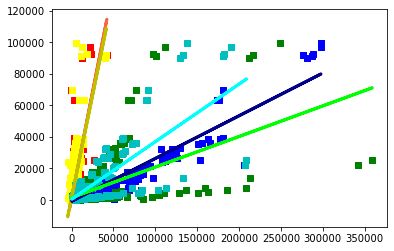

In [250]:
from sklearn import linear_model
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
number_of_students='number_of_students_in_percent'

employees_average_monthly_wage_change_in_percent='employees_average_monthly_wage_change_in_percent'
self_employees_average_monthly_wage_change_in_percent='self_employees_average_monthly_wage_change_in_percent'
number_of_bachelor_graduates_in_percent='number_of_bachelor_graduates_in_percent'
number_of_high_school_graduates_in_percent='number_of_high_school_graduates_in_percent'
Registration_for_higher_education_within_8_years_in_percent='Registration_for_higher_education_within_8_years_in_percent'
precent_count_Age='count_age_precent'

lr = linear_model.LinearRegression() # create a linear regression object
y = final_DataFrame[[number_of_students]].values.reshape(final_DataFrame[number_of_students].shape[0],1)

print(final_DataFrame)
generateGragh(employees_average_monthly_wage_change_in_percent,'r','tomato')
generateGragh(self_employees_average_monthly_wage_change_in_percent,'yellow','y')
generateGragh(number_of_bachelor_graduates_in_percent,'blue','darkblue')
generateGragh(number_of_high_school_graduates_in_percent,'green','lime')
generateGragh(Registration_for_higher_education_within_8_years_in_percent,'c','aqua')
generateGragh(precent_count_Age,'b','b')

#take all columns for next blocks
# x = final_DataFrame[['number_of_bachelor_graduates_in_percent', 'number_of_high_school_graduates_in_percent', 'Registration_for_higher_education_within_8_years_in_percent']]#plt.scatter(x=x,y=y,c='b',marker='s',label='all')
x = final_DataFrame[[precent_count_Age,'employees_average_monthly_wage_change_in_percent', 'self_employees_average_monthly_wage_change_in_percent','number_of_bachelor_graduates_in_percent', 'number_of_high_school_graduates_in_percent', 'Registration_for_higher_education_within_8_years_in_percent']]

m = lr.fit(X=x, y=y);

plt.xlabel('Referance columns')
plt.ylabel('number_of_students')
plt.show()

In [ ]:
print("R2:",lr.score(x,y))
print("R2:",r2_score(y,lr.predict(x)))

In [ ]:
print(final_DataFrame.corr())
pd.plotting.scatter_matrix(final_DataFrame, figsize=(20, 20), diagonal='kde')
plt.show()